In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
%matplotlib inline
SIG_M_NYE = []
SIG_B_NYE = []
Data_COA = []
Data_COD = []
Data = []
Data_cc = []
%load_ext autoreload
%autoreload 2

xp = [150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290]
fp = [2.543, 3.252, 4.113, 5.145, 6.378, 7.840, 9.567, 11.6, 13.98, 16.76, 20.01, 23.82, 28.27, 33.47, 39.60]
rho_0 = np.interp(285, xp, fp)

def a_lyambda(lyambda):
    if lyambda <= 5:
        return (1 + 0.117 * lyambda**2)**0.5
    elif (lyambda >= 5) and (lyambda <= 8):
        return 1 + 0.1*lyambda + 0.16*lyambda**2
    

def nu_counts(COD):
    nu_L = 6.53e-6
    nu_G = 33.65e-6
    if ((COD / nu_G) > 0) and  ((COD / nu_G) < 0.1):
        return nu_L
    elif ((COD / nu_G) > 0.1) and  ((COD / nu_G) < 10):
        return nu_L + ((nu_G - nu_L)/9.9)*((COD/nu_G)-0.1)
    elif ((COD / nu_G) > 10):
        return nu_G
    

def finding_Cd(d, k, F, F1, F2):
    if d > 0:
        if F < F1:
            return 0.4 * (1 - d)
        elif (F > F1) and (F < F2):
            return (1 - d)**2 / (1 + (2*F)**0.5)
        elif F > F2:
            return (1 - d)**2 / ((1 - (P_ex / P)**2)**0.5 * (1 + (2 * F)**0.5) - k)
    else:
        if F < F2:
            return min(0.4, 0.6*(1+d), ((1 - d)**2 / (1 + (2*F)**0.5)))
        elif F > F2:
            return (1 - d)**2 / ((1 - (P_ex / P)**2)**0.5 * (1 + (2 * F)**0.5) - k)
   

## Первый кольцевой деффект, СС-213

In [2]:
# НУЭ
t = 16e-3
D_out = 273e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = 13e3
M_x = 7.153e3
M_y = -9.608e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.3801145914598513 / 2
L = 2 * C 
P_ex = 101325

Мембранное напряжение НУЭ = 25.372 МПа
Изгибное напряжение НУЭ = 15.33 МПа
Значение COA для сковзной трещины СС-213: 6.79e-04
Значение COD для сковзной трещины СС-213: 2.27e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

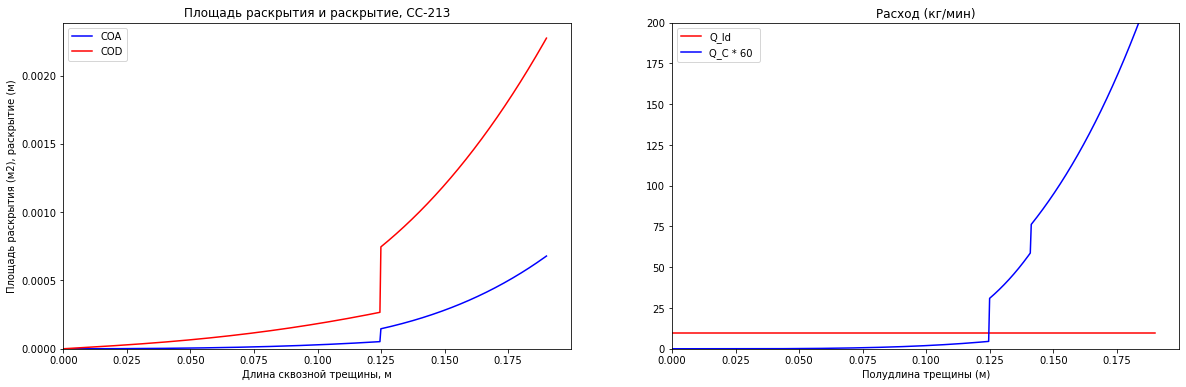

In [3]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 500)
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-213: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-213: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))
#Graphics
fi, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 200)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')



## Первый кольцевой деффект, СС-214

In [4]:
t = 16e-3
D_out = 273e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = 4e3
M_x = -7.7e3
M_y = -9.823e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.3836162330055363 / 2
L = 2 * C 
P_ex = 101325

Мембранное напряжение НУЭ = 24.675 МПа
Изгибное напряжение НУЭ = 15.974 МПа
Значение COA для сковзной трещины СС-214: 7.02e-04
Значение COD для сковзной трещины СС-214: 2.33e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

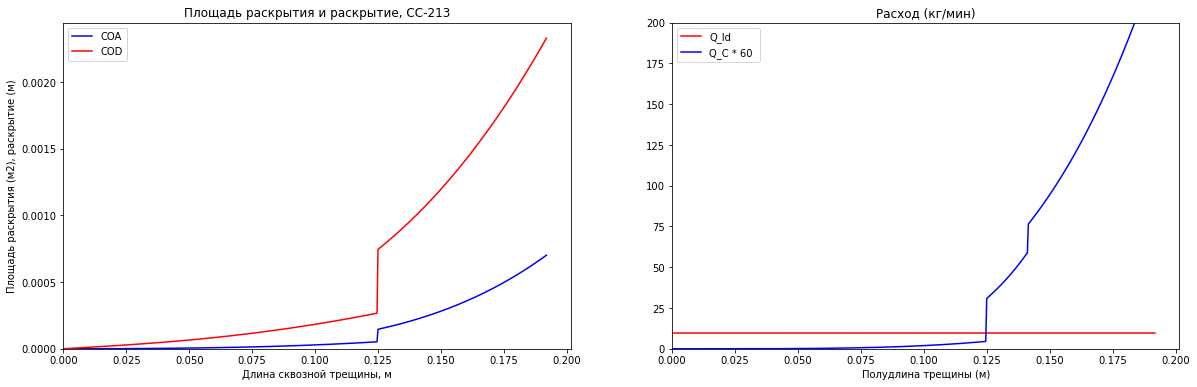

In [5]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 500)
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 200)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

## Первый кольцевой деффект, СС-222

In [6]:
t = 16e-3
D_out = 273e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = 34e3
M_x = 0.594e3
M_y = 7.471e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.3910123904917853 / 2
P_ex = 101325

Мембранное напряжение НУЭ = 26.997 МПа
Изгибное напряжение НУЭ = 9.592 МПа
Значение COA для сковзной трещины СС-214: 6.77e-04
Значение COD для сковзной трещины СС-214: 2.20e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

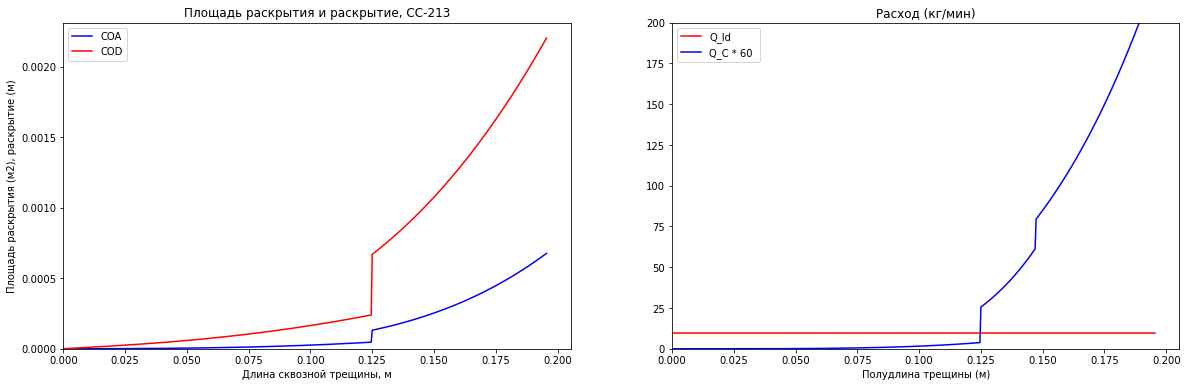

In [7]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 500)
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 200)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

## Второй кольцевой деффект, СС-8

In [8]:
t = 19e-3
D_out = 325e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = 18.572e3
M_x = 1.372e3
M_y = 8.095e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.4787533589990931 / 2
P_ex = 101325

Мембранное напряжение НУЭ = 25.455 МПа
Изгибное напряжение НУЭ = 6.241 МПа
Значение COA для сковзной трещины СС-214: 8.92e-04
Значение COD для сковзной трещины СС-214: 2.39e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

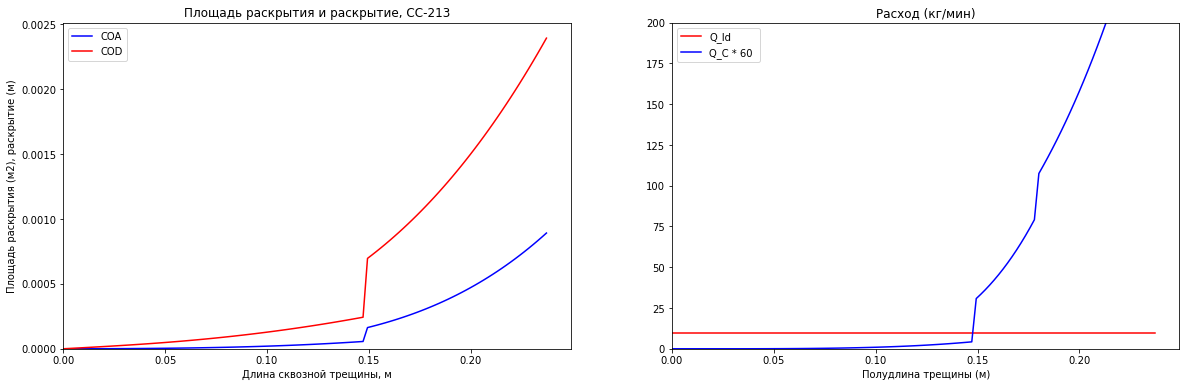

In [9]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 110)
X_c[-1] = X_c[-2]
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 200)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

## Второй кольцевой деффект, СС-20

In [10]:
t = 19e-3
D_out = 325e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = 10.363e3
M_x = -3.429e3
M_y = 10.719e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.46496234328325237 / 2
P_ex = 101325

Мембранное напряжение НУЭ = 25.006 МПа
Изгибное напряжение НУЭ = 8.554 МПа
Значение COA для сковзной трещины СС-214: 8.76e-04
Значение COD для сковзной трещины СС-214: 2.40e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

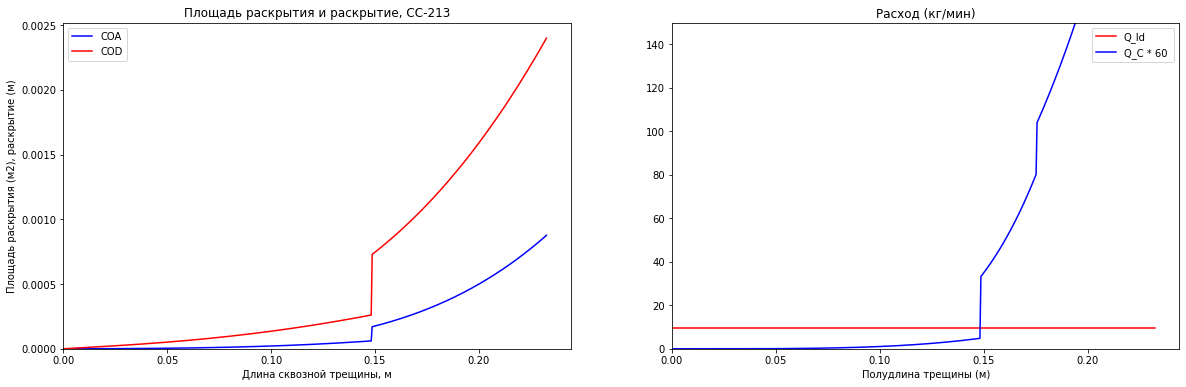

In [11]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 500)
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 150)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

## Второй кольцевой деффект, СС-14

In [12]:
t = 19e-3
D_out = 325e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = 28.602e3
M_x = -6.393e3
M_y = 2.374e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.48057554891836285 / 2
P_ex = 101325

Мембранное напряжение НУЭ = 26.005 МПа
Изгибное напряжение НУЭ = 5.184 МПа
Значение COA для сковзной трещины СС-214: 8.52e-04
Значение COD для сковзной трещины СС-214: 2.30e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

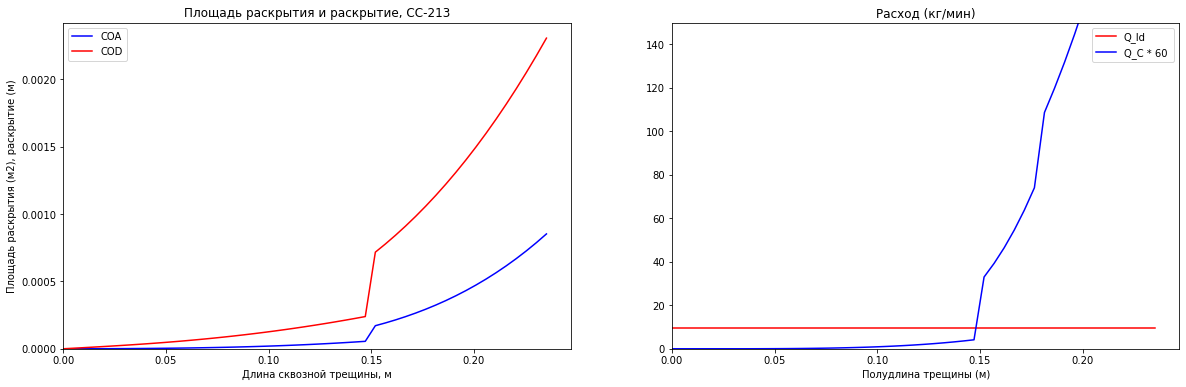

In [13]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 50)
X_c[-1] = X_c[-2]
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 150)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

## Третий кольцевой деффект, СС-349b


In [14]:
t = 24e-3
D_out = 426e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = -0.38e3
M_x = 9.365e3
M_y = 14.363e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.6271483149390416 / 2
P_ex = 101325

Мембранное напряжение НУЭ = 25.534 МПа
Изгибное напряжение НУЭ = 5.965 МПа
Значение COA для сковзной трещины СС-214: 1.47e-03
Значение COD для сковзной трещины СС-214: 3.06e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

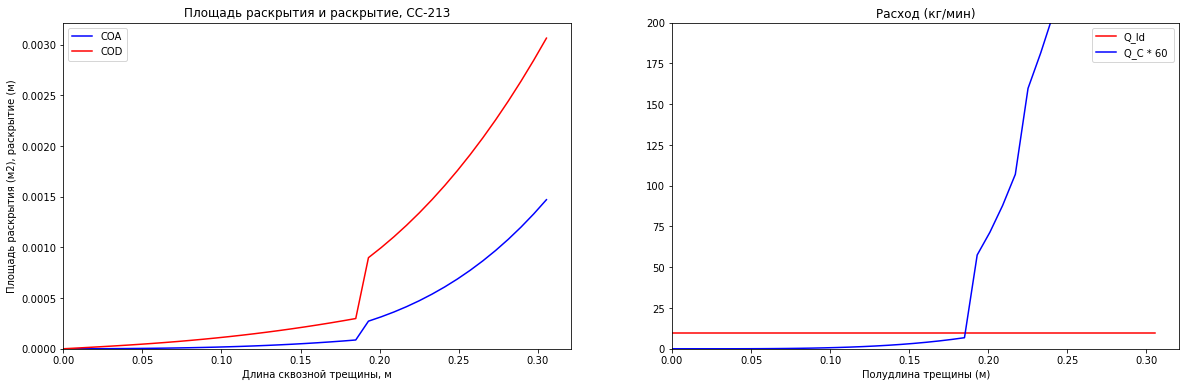

In [15]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 40)
X_c[-1] = X_c[-2]
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 200)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

## Третий кольцевой деффект, СС-350

In [16]:
t = 24e-3
D_out = 426e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = 0.37e3
M_x = -28.264e3
M_y = -19.048e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.6061562113859115 / 2
P_ex = 101325

Мембранное напряжение НУЭ = 25.559 МПа
Изгибное напряжение НУЭ = 11.857 МПа
Значение COA для сковзной трещины СС-214: 1.70e-03
Значение COD для сковзной трещины СС-214: 3.57e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

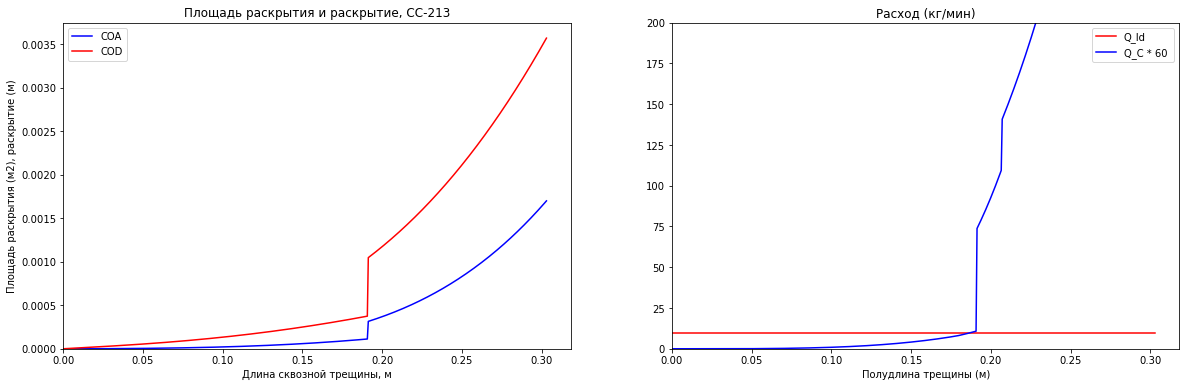

In [17]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 500)
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 200)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

## Третий кольцевой деффект, СС-350a

In [18]:
t = 24e-3
D_out = 426e-3
D_in = D_out - 2*t
R_out = D_out / 2
R_in = D_in / 2
P = 6.9e6
N_z = -5.021e3
M_x = -35.81e3
M_y = -16.918e3
R_p_02_max = 2.08e8 
Rm_max = 4.65e8
R_p_02_min = 1.83e8 
Rm_min = 3.66e8
sig_F = 0.5 * (R_p_02_max + Rm_max)
T = 285
E = 1.83e11
mu = 0.3
R_mean = (R_out + R_in) / 2
C = 0.6008289674989338 / 2
P_ex = 101325

Мембранное напряжение НУЭ = 25.381 МПа
Изгибное напряжение НУЭ = 13.778 МПа
Значение COA для сковзной трещины СС-214: 1.72e-03
Значение COD для сковзной трещины СС-214: 3.65e-03


Text(0.5, 1.0, 'Расход (кг/мин)')

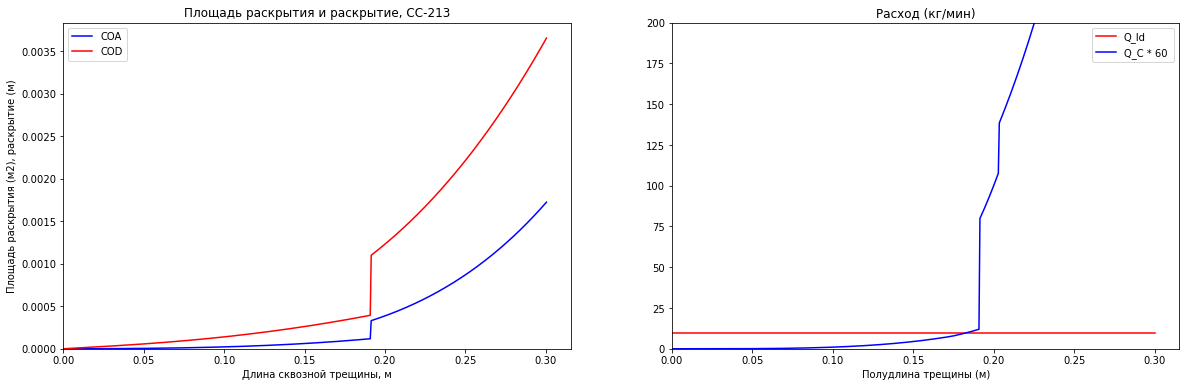

In [19]:
sig_m_nye = (P * R_in**2  / (R_out**2 - R_in**2)) + ((N_z / (np.pi*(R_out**2 - R_in**2))))                                             
print('Мембранное напряжение НУЭ = {0} МПа'.format(round(sig_m_nye / 1e6, 3)))
SIG_M_NYE.append(round(sig_m_nye / 1e6, 3))
Data.append(round(sig_m_nye / 1e6, 3))

sig_b_nye = np.sqrt(M_x**2 + M_y**2) / ((np.pi * (( R_in + t/2))**3 * t)) * R_out
print('Изгибное напряжение НУЭ = {0} МПа'.format(round(sig_b_nye / 1e6, 3)))
SIG_B_NYE.append(round(sig_b_nye / 1e6, 3))
Data.append(round(sig_b_nye / 1e6, 3))

#Построение графиков COA COD от длины сквозной трещины
Y_COA = []
Y_COD = []
Q_ld = []
Q_c = []
X_c = np.linspace(0.00001, C, 500)
for c in X_c:
    L = 2 * c
    sig_eq = sig_m_nye + sig_b_nye
    lyambda = (12 * (1 - mu**2))**0.25 * (c / np.sqrt(R_mean * t))
    a_lyam = a_lyambda(lyambda)
    A0 = 7.54 * (sig_eq / E) * c**2
    x = (1 / np.sqrt(2)) * (sig_eq / sig_F)
    gamma = (1 - x**3) / (1 - x**2)**2
    COA = a_lyam * gamma * A0
    COD = (2 * COA) / (np.pi * c)
    
    A_ex = COA * (R_out**2 / R_mean**2)
    A_0 = COA * (R_in**2 / R_mean**2)
    w_0 = A_0 / L
    w_ex = A_ex / L
    W = (w_0 + w_ex) / 2
    nu = nu_counts(COD)
    f = (3.64 * math.log10(2*W / nu) - 2.636)**(-2)
    d = (w_ex - w_0) / (2*W)
    F = f * (t / W)
    k = (1 - d)*((P / P_ex) - (((P / P_ex)**2)-1)**0.5)
    F1 = ((1.5 + 2.5*d)**2) / 2
    F2 = (((1 - d)*(P/P_ex) - 1)**2) / 2
    C_D = finding_Cd(d, k, F, F1, F2)
    q_ld = 9.5
    q_c = C_D * (P * rho_0)**0.5 * W * L
    Q_ld.append(q_ld)
    Q_c.append(q_c*60)
    Y_COA.append(COA)
    Y_COD.append(COD)

print('Значение COA для сковзной трещины СС-214: {0}'.format(format(Y_COA[-1], '.2e')))
Data.append(format(COA, '.2e'))
print('Значение COD для сковзной трещины СС-214: {0}'.format(format(Y_COD[-1], '.2e')))
Data.append(format(COD, '.2e'))

#Определение точки пересечения двух графиков
idx = np.argwhere(np.diff(np.sign(np.array(Q_c) - np.array(Q_ld)))).flatten()
dva_c_ld = 2 * X_c[idx]
Data.append(round(dva_c_ld[0], 5))

#Graphics
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,6))
ax[0].plot(X_c, Y_COA, 'b',)
ax[0].plot(X_c, Y_COD, 'r')
ax[0].set_title('Площадь раскрытия и раскрытие, СС-213')
ax[0].set_xlabel('Длина сквозной трещины, м')
ax[0].set_ylabel('Площадь раскрытия (м2), раскрытие (м)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].legend(('COA', 'COD'))

ax[1].plot(X_c, Q_ld, 'r',)
ax[1].plot(X_c, Q_c, 'b')
ax[1].legend(('Q_ld', 'Q_C * 60 '))
ax[1].set_xlim(0)
ax[1].set_ylim(0, 200)
ax[1].set_xlabel('Полудлина трещины (м)')
ax[1].set_title('Расход (кг/мин)')

In [20]:
index = ['CC-213', 'CC-214', 'CC-222', 'CC-8', 'CC-20', 'CC-14', 'CC-349b', 'CC-350', 'CC-350a']
columns = [('Мембранное напряжение, МПа') , ('Изгибное напряжение, МПа'), ('COA, м2'), ('COD, м'), ('2C_ld, м')]
data = np.array(Data).reshape((9,5))
df = pd.DataFrame(data, columns=columns, index=index)
df

,"Мембранное напряжение, МПа","Изгибное напряжение, МПа","COA, м2","COD, м","2C_ld, м"
CC-213,25.372,15.33,6.79e-04,2.27e-03,0.2491
CC-214,24.675,15.974,7.02e-04,2.33e-03,0.24909
CC-222,26.997,9.592,6.77e-04,2.20e-03,0.24919
CC-8,25.455,6.241,8.92e-04,2.39e-03,0.29429
CC-20,25.006,8.554,8.76e-04,2.40e-03,0.29632
CC-14,26.005,5.184,8.52e-04,2.30e-03,0.29424
CC-349b,25.534,5.965,1.47e-03,3.06e-03,0.36986
CC-350,25.559,11.857,1.70e-03,3.57e-03,0.3705
CC-350a,25.381,13.778,1.72e-03,3.65e-03,0.36364


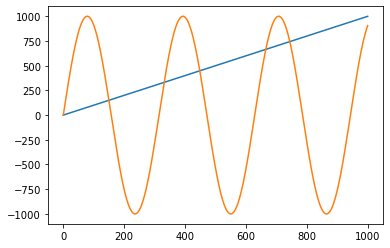

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1000)
f = np.arange(0, 1000)
g = np.sin(np.arange(0, 10, 0.01) * 2) * 1000

plt.plot(x, f, '-')
plt.plot(x, g, '-')

idx = np.argwhere(np.diff(np.sign(f - g))).flatten()


In [22]:
type(x)

numpy.ndarray